**<b><font color="red">ch13. 데이터시각화</font><b>**

In [1]:
# 데이터 그래프 시각화 하기전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
# 한글 설정.
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
#경고 메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

# 3절. Seborn

<pre>
- matplotlib를 기반으로 만들어진 고수준 그래프 라이브러리
    공식 사이트 : https://seaborn.pydata.org/
    그래프 API : https://seaborn.pydata.org/api.html

- Seaborn으로 그래프를 그리기 위해서 다음 단계를 따른다.
    1)데이터 준비
    2)미적속성 설정
    3)함수를 이용하여 그래프를 그리기
    4)그래프 출력, 저장
<pre>

## 3.1 데이터 준비하기

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
121,5.6,2.8,4.9,2.0,virginica


In [4]:
# csv파일을 가져왔으면 해야할 순서.
iris.shape

(150, 5)

In [5]:
iris.head() # or tail

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info() # 결측치를 제외한 갯수,dtype(각 요소들의 타입.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.isna().sum() # or isnull 로 결측치 확인. sum() axis=0 기본값.열단위로 .

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris.describe() # 결측치를 제외한 요소별 요약.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.describe(exclude='float64')

,species
count,150
unique,3
top,setosa
freq,50


In [15]:
# 패키지의 데이터셋 가져오기 (Titanic)
import statsmodels.api as sm
r_titanic = sm.datasets.get_rdataset("Titanic", package="datasets").data
r_titanic.head()

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [16]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
titanic.info()
# survived (생존 여부), pclass(티켓클래스 1,2,3등석), sibsp(함께 탑승한 형제와 배우자수)
# parch(함께 탑승한 부모, 아이수) fare(탑승료.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 3.2 미적 속성 설정하기

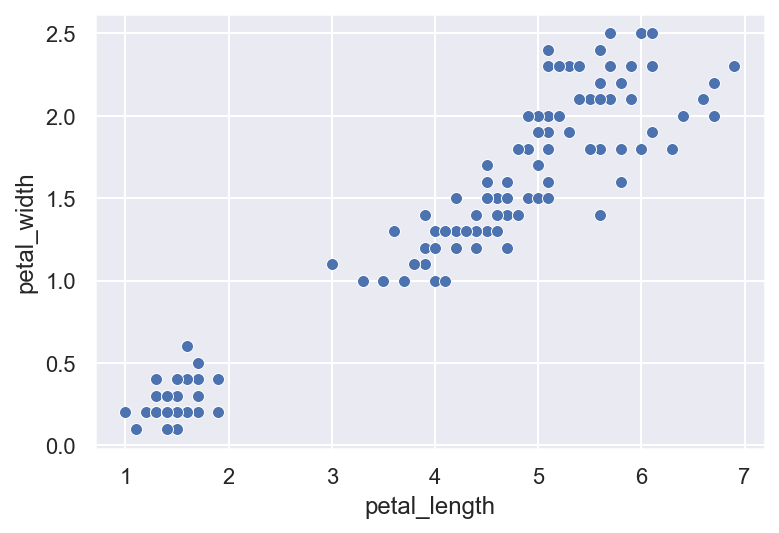

In [25]:
sns.set(style="darkgrid") # style="white": 기본값
# style : white(기본), darkgrid, whitegrid, dark, ticks
sns.scatterplot(x='petal_length', y='petal_width', data=iris)
# a = 변수에 넣거나 plt.show()
plt.show()

**2) 컬러 팔레트**

- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette<br>
- https://matplotlib.org/stable/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html
- http://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

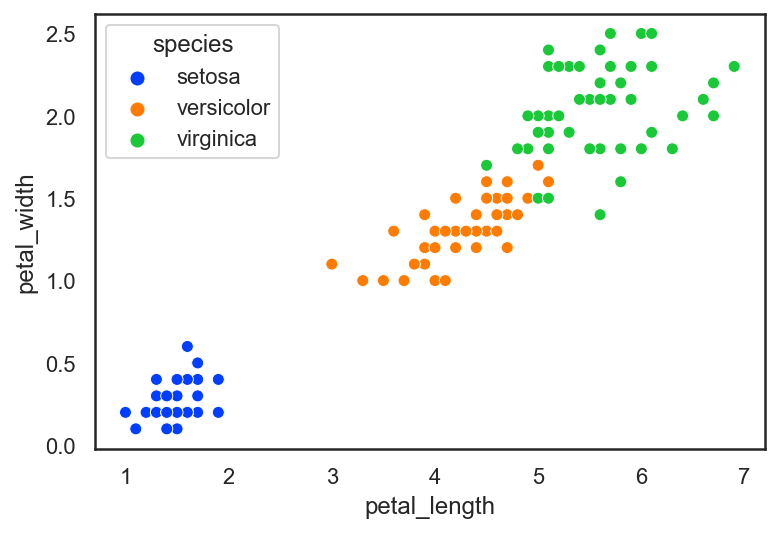

In [29]:
sns.set(palette="bright", style="white")
#bright/deep/muted/pastel/dark/color blind/ etc....
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')

**3) 컨텍스트 지정(배율)**

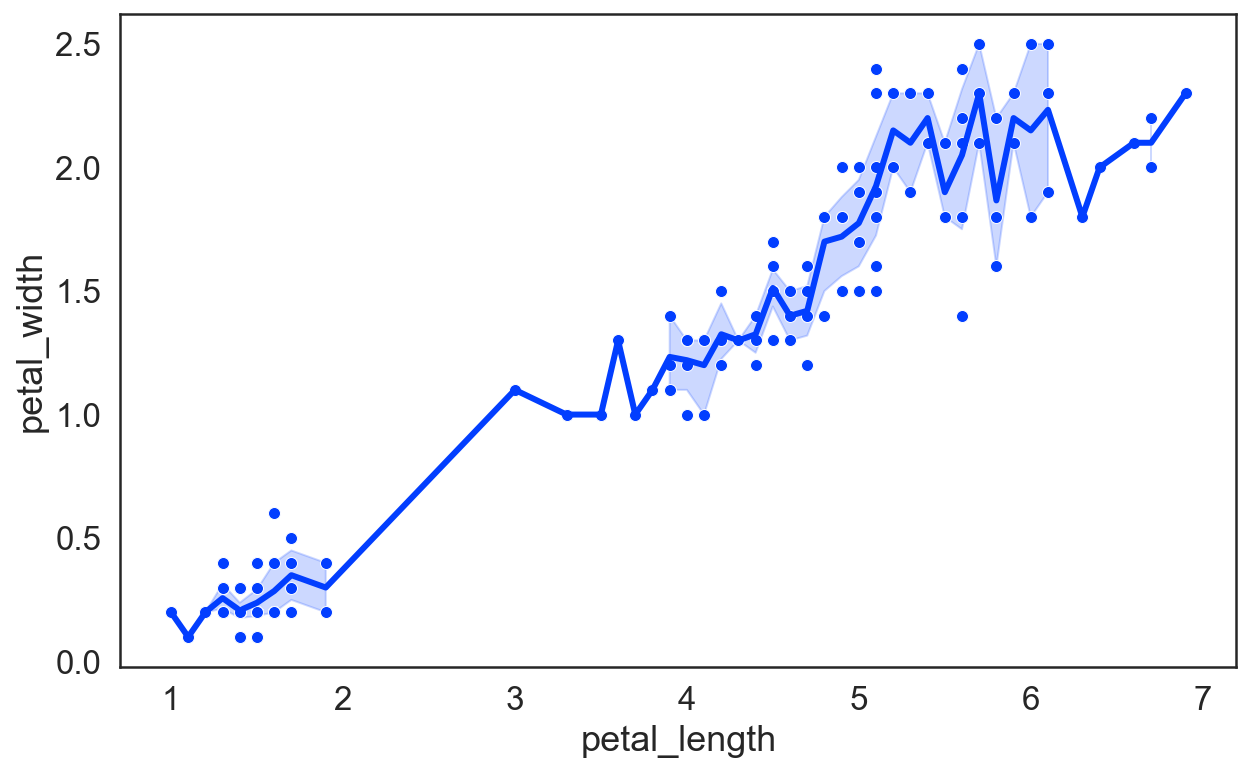

In [38]:
plt.figure(figsize=(10, 6))
sns.set_context("notebook", font_scale=1.5, rc={'lines.linewidth':3})
# "notebook" -> 기본값 1:1 배율
#paper(0.8), talk(1.3), poster(1.6)
sns.lineplot(x='petal_length', y='petal_width', data=iris)
sns.scatterplot(x='petal_length', y='petal_width', data=iris)
plt.show()

## 3.3 Seaborn 함수로 그래프 그리기

**1) Relational plots : 관계형 그래프**

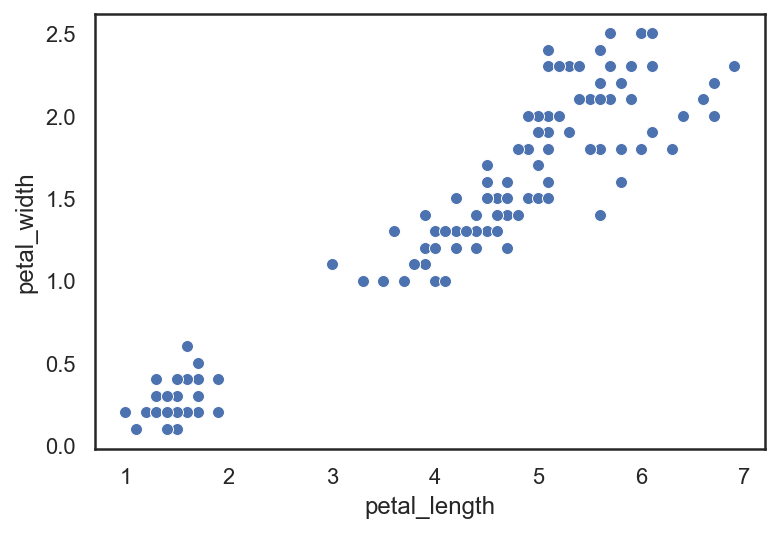

In [40]:
sns.set(palette="deep", style="white")
sns.scatterplot(x='petal_length', y='petal_width', data=iris)
plt.show()

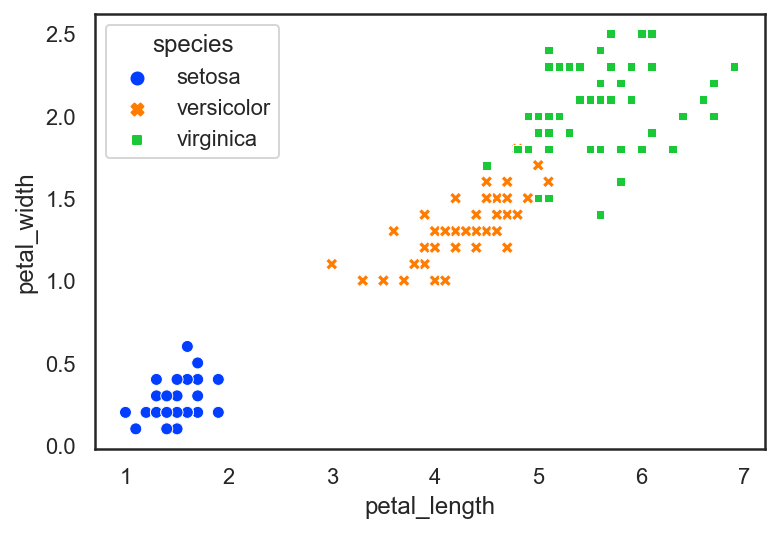

In [44]:
# hue 속성에 그룹변수를 넣을때 너무 많으면 안댐.
# hue 속성에 그룹변수를 넣어 그룹화 하여 그룹별 다른 색상 다른 style
# iris.describe(exclude='float64')
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species",
                palette="bright", style="species")
plt.show()

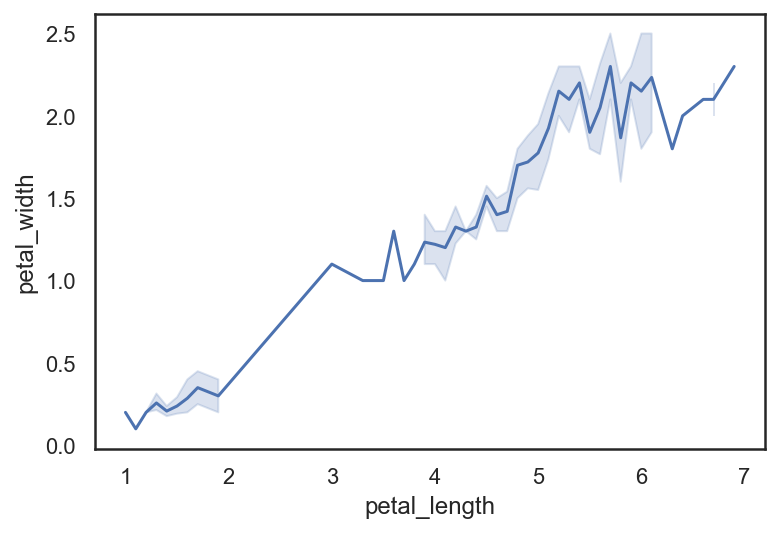

In [45]:
sns.lineplot(x='petal_length', y='petal_width', data=iris)
plt.show()

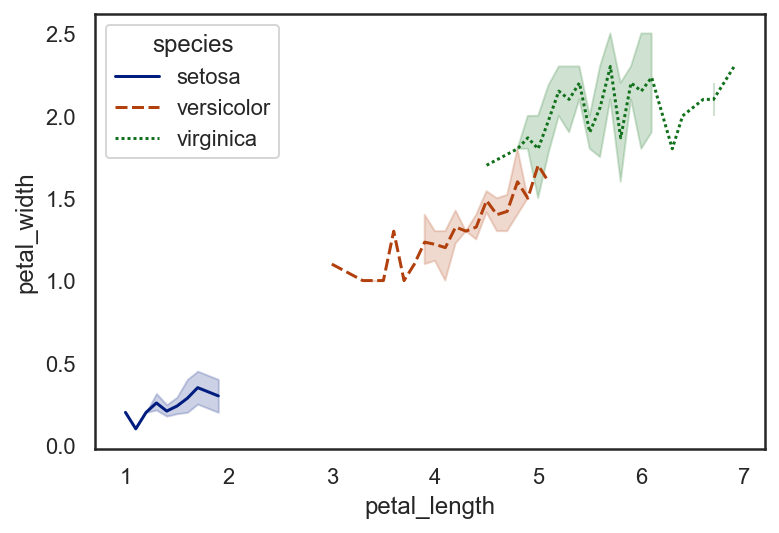

In [56]:
# hue="species" hue 별로 나눠서 그래프출력. groupby 대신 하는 hue.
sns.lineplot(x='petal_length', y='petal_width', data=iris,
             hue="species", style="species", palette="dark")
# sns.scatterplot(x='petal_length', y='petal_width', data=iris,hue="species")
plt.show()

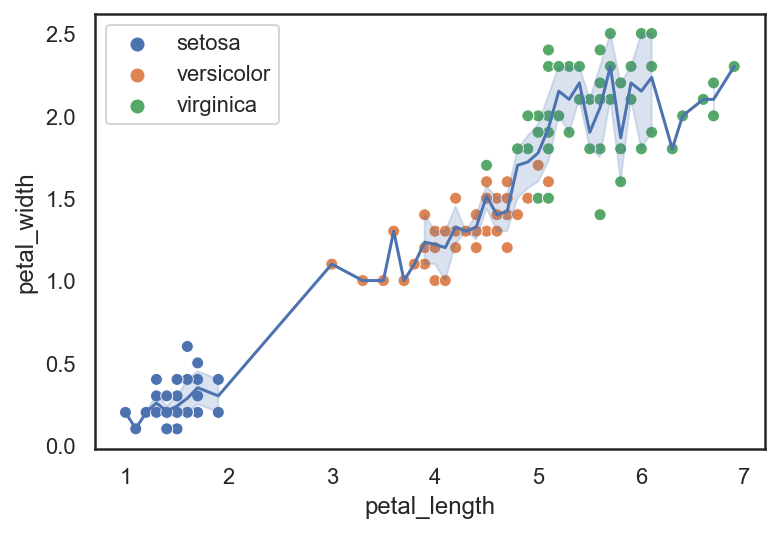

In [50]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris,hue="species")
sns.lineplot(x='petal_length', y='petal_width', data=iris)
plt.show()

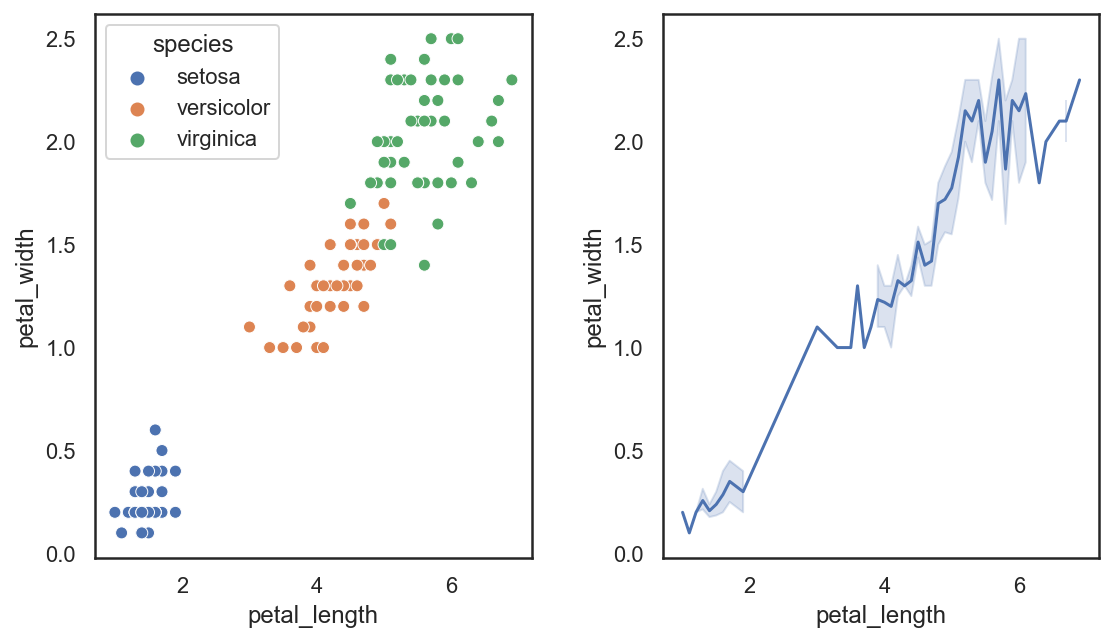

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(9,5))
plt.subplots_adjust(wspace=0.3)
sns.scatterplot(x="petal_length", y="petal_width", data=iris, hue="species",
                ax=axes[0]) # ax=axes[0] 0번째방에(왼쪽그래프)
sns.lineplot(x='petal_length', y='petal_width', data=iris, ax=axes[1])
plt.show()  # ax=axes[1] 1번째 방에(오른쪽 그래프)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

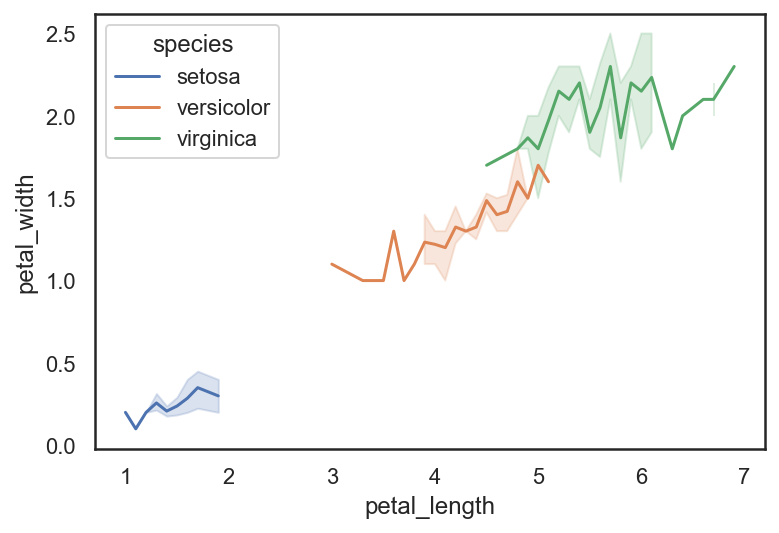

In [55]:
sns.lineplot(x='petal_length', y='petal_width', data=iris, hue="species")

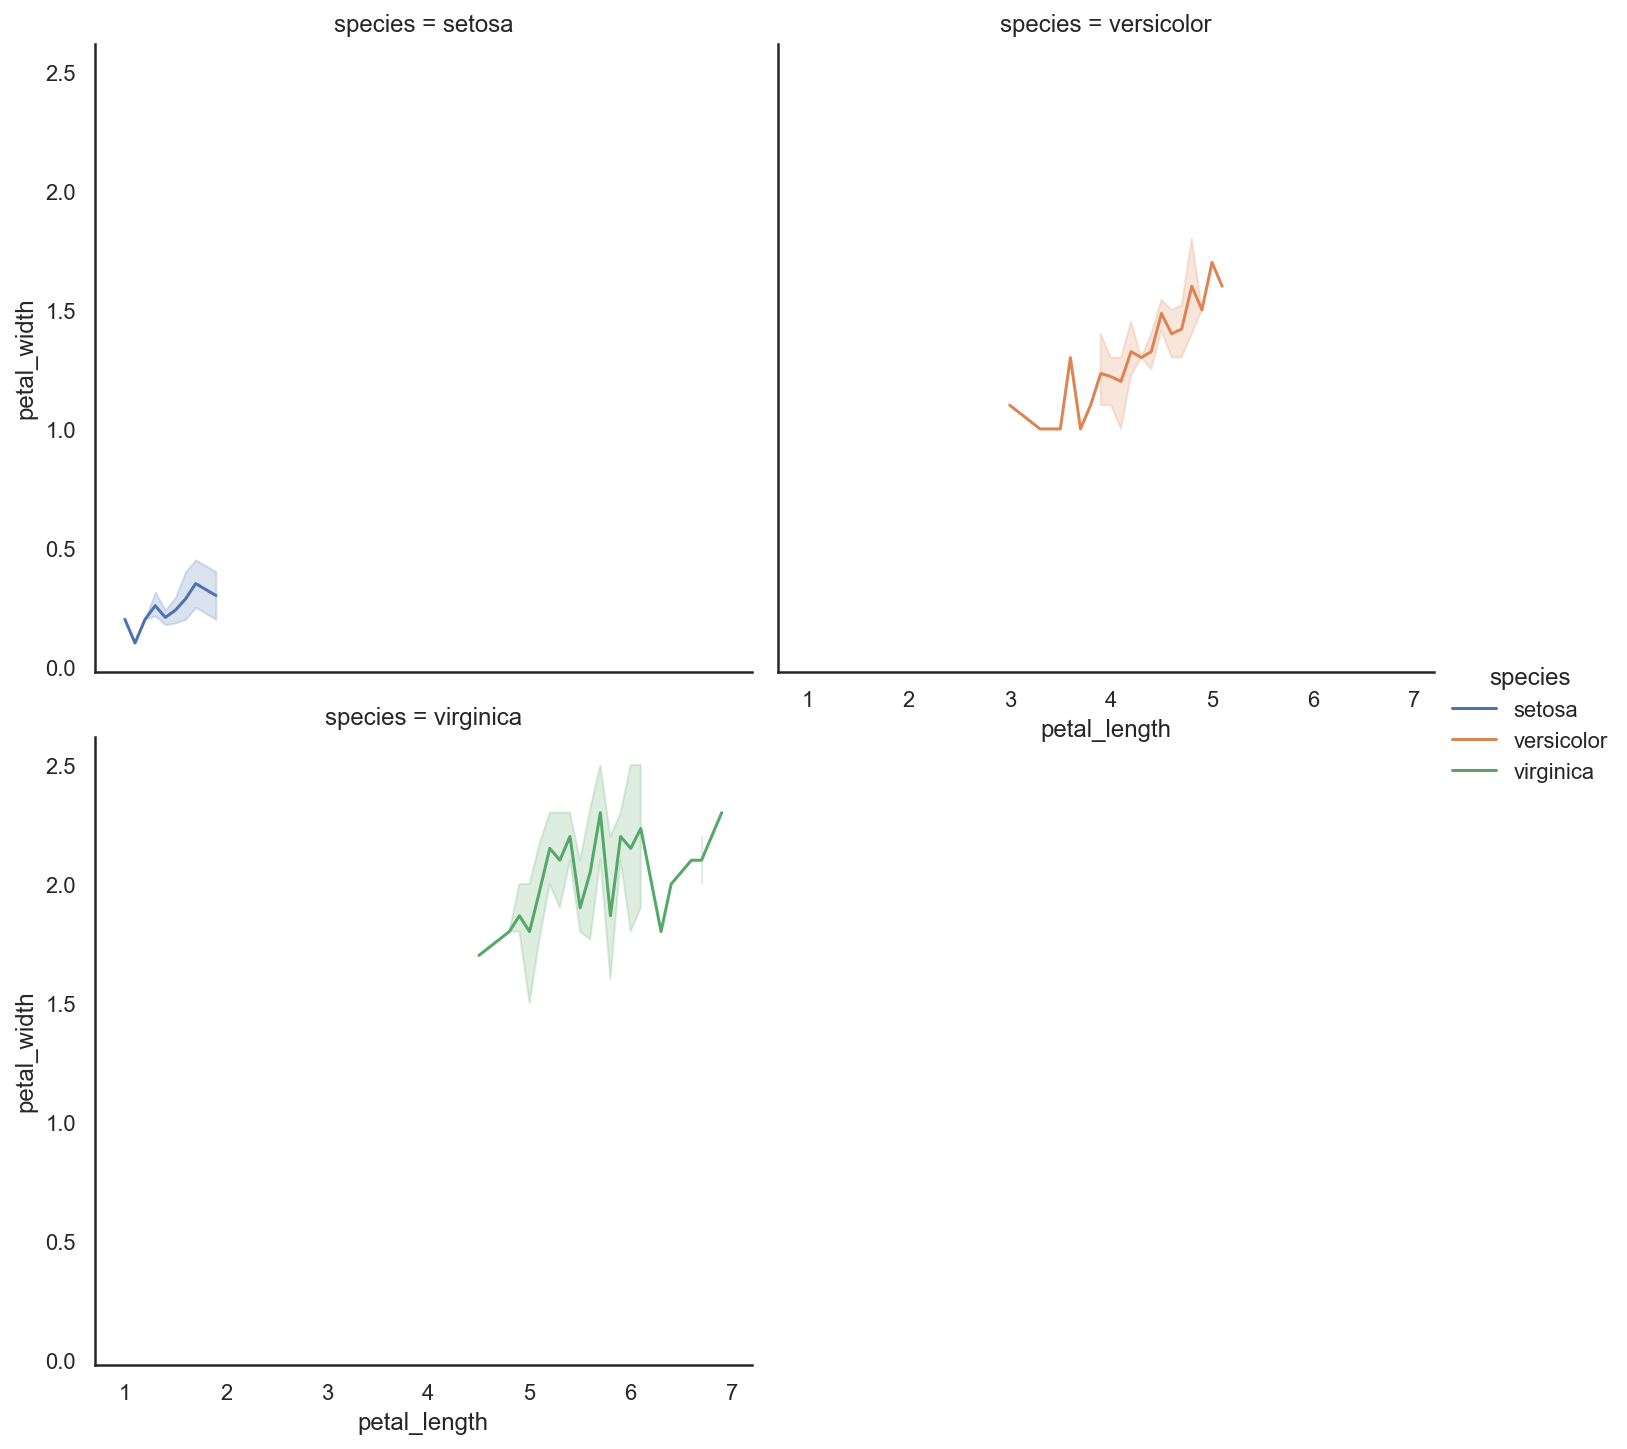

In [61]:
# linelpot을 서브플롯으로 표현 : relplot  -> kind=' ? ' ?를 안쓰면 기본값인 scatter로.
# plt.figure(figsize=(8, 4)) 로 전체 그래프 크기 조정 가능.
sns.relplot(x='petal_length', y='petal_width', data=iris, hue="species", 
            kind='line', #line, box ,scatter , ....
            col="species", col_wrap=2)
# col단위 로 서브플롯 표현
# col_wrap=2 => 한줄에 표현될 서브플롯수.

**2)categorical plots : 범주형 그래프**

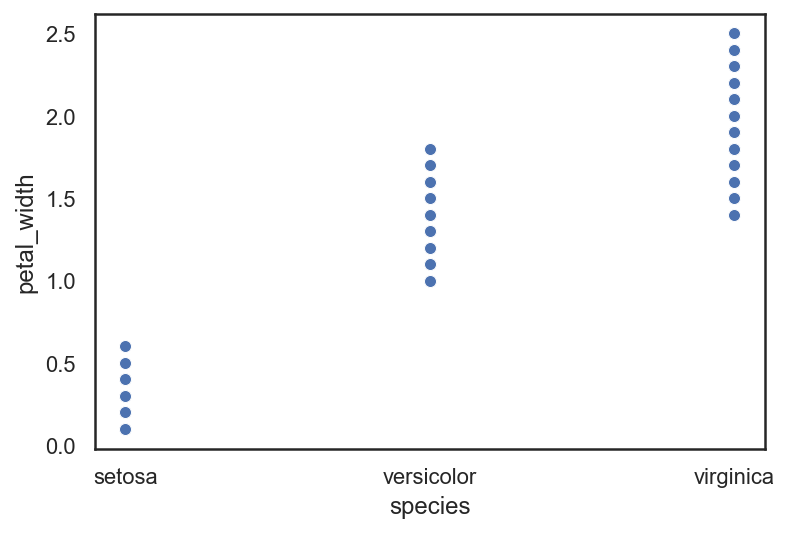

In [69]:
# 이렇게 하면 의미가 없어진다.
ax = sns.scatterplot(x="species", y="petal_width", data=iris)

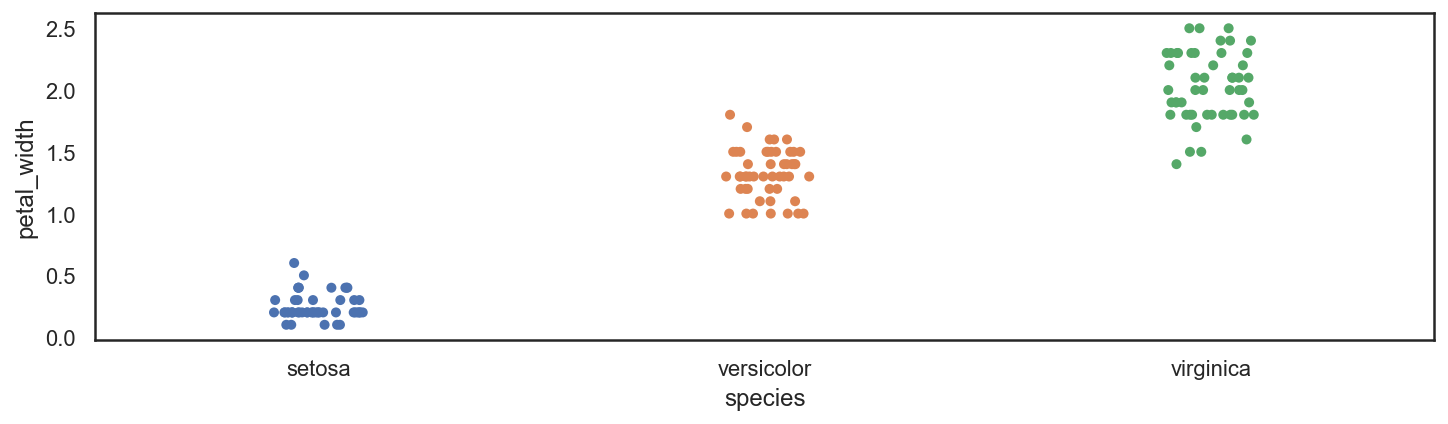

In [70]:
# x축이 범주형 데이터일 경우, scatterplot은 적합하지 않아서 다른것으로 사용할려고 한다.
#다른 산점도 방법 1.
plt.figure(figsize=(12,3))
ax = sns.stripplot(x="species", y="petal_width", data=iris)

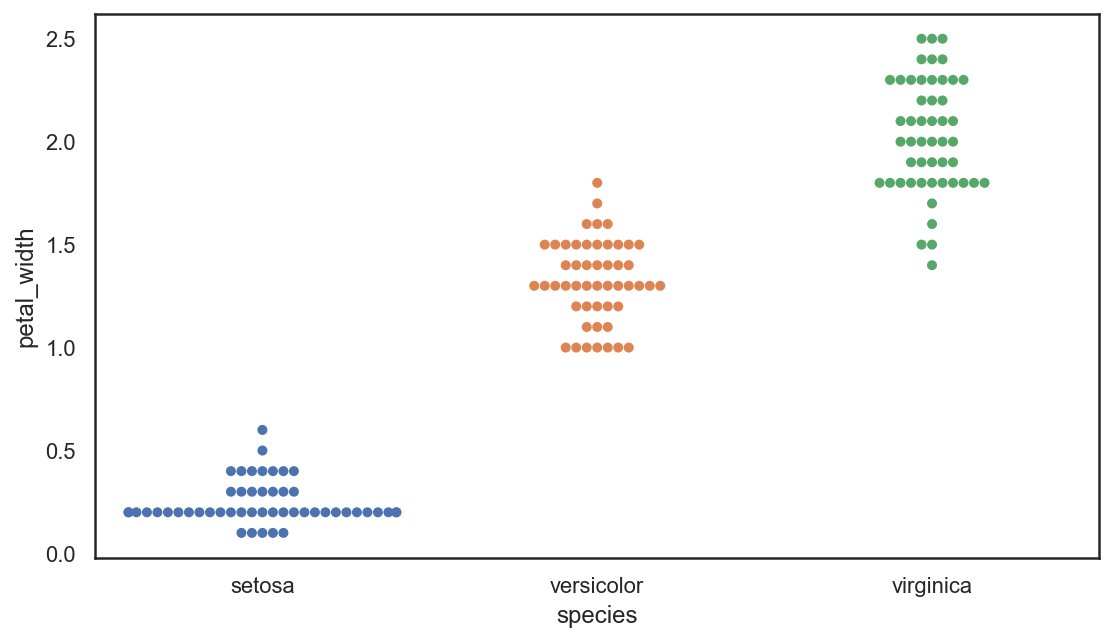

In [71]:
# 다른 산점도 방법 2.
plt.figure(figsize=(9,5))
ax = sns.swarmplot(x="species", y="petal_width", data=iris)
# swarmplot : 산점도들이 중첩이 되지않게한다.

In [72]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


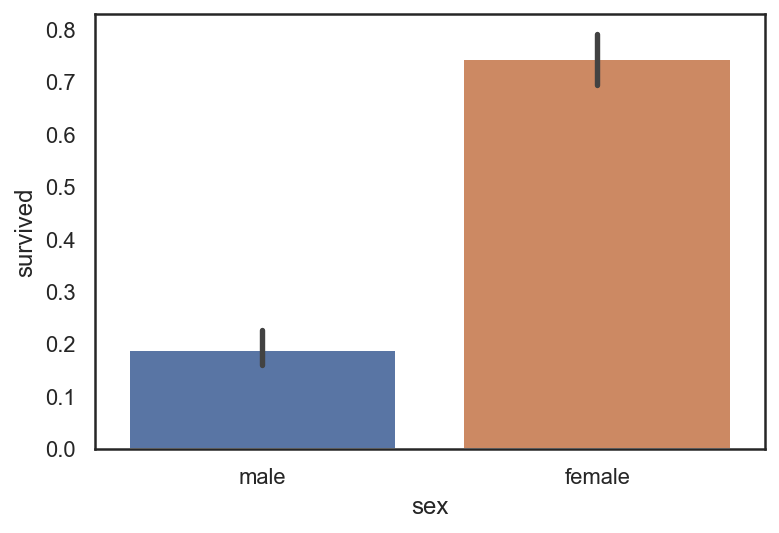

In [83]:
# 성별 survived의 평균을 막대그래프로 표현할 예정. 사망0 , 생존 1
a = sns.barplot(x="sex", y="survived", data=titanic)
# barplot 기본값들중 
# ci 때문에 95% 부근을 표현해준다. => 왜그런지 알고싶으면 shitf + tab ,tab

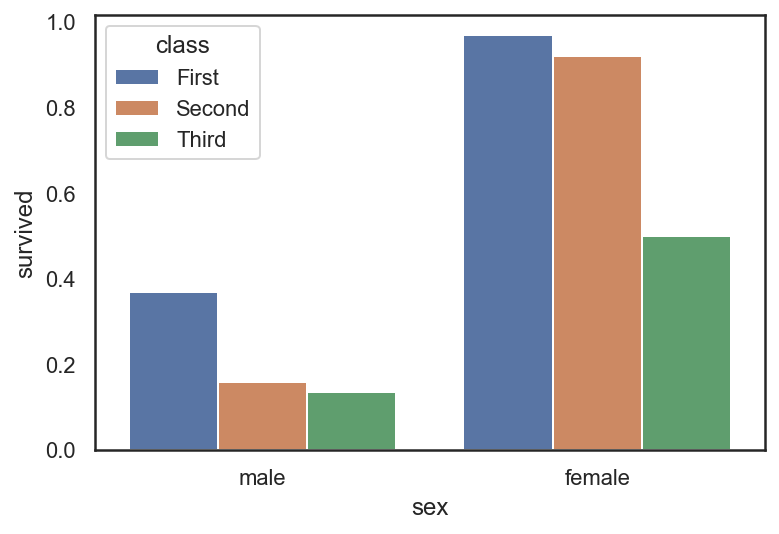

In [80]:
# class 별로 따로 성별 생존률 평균  ci =None-> 95%부근 생략. 
a = sns.barplot(x="sex", y="survived", data=titanic, hue="class", ci=None)

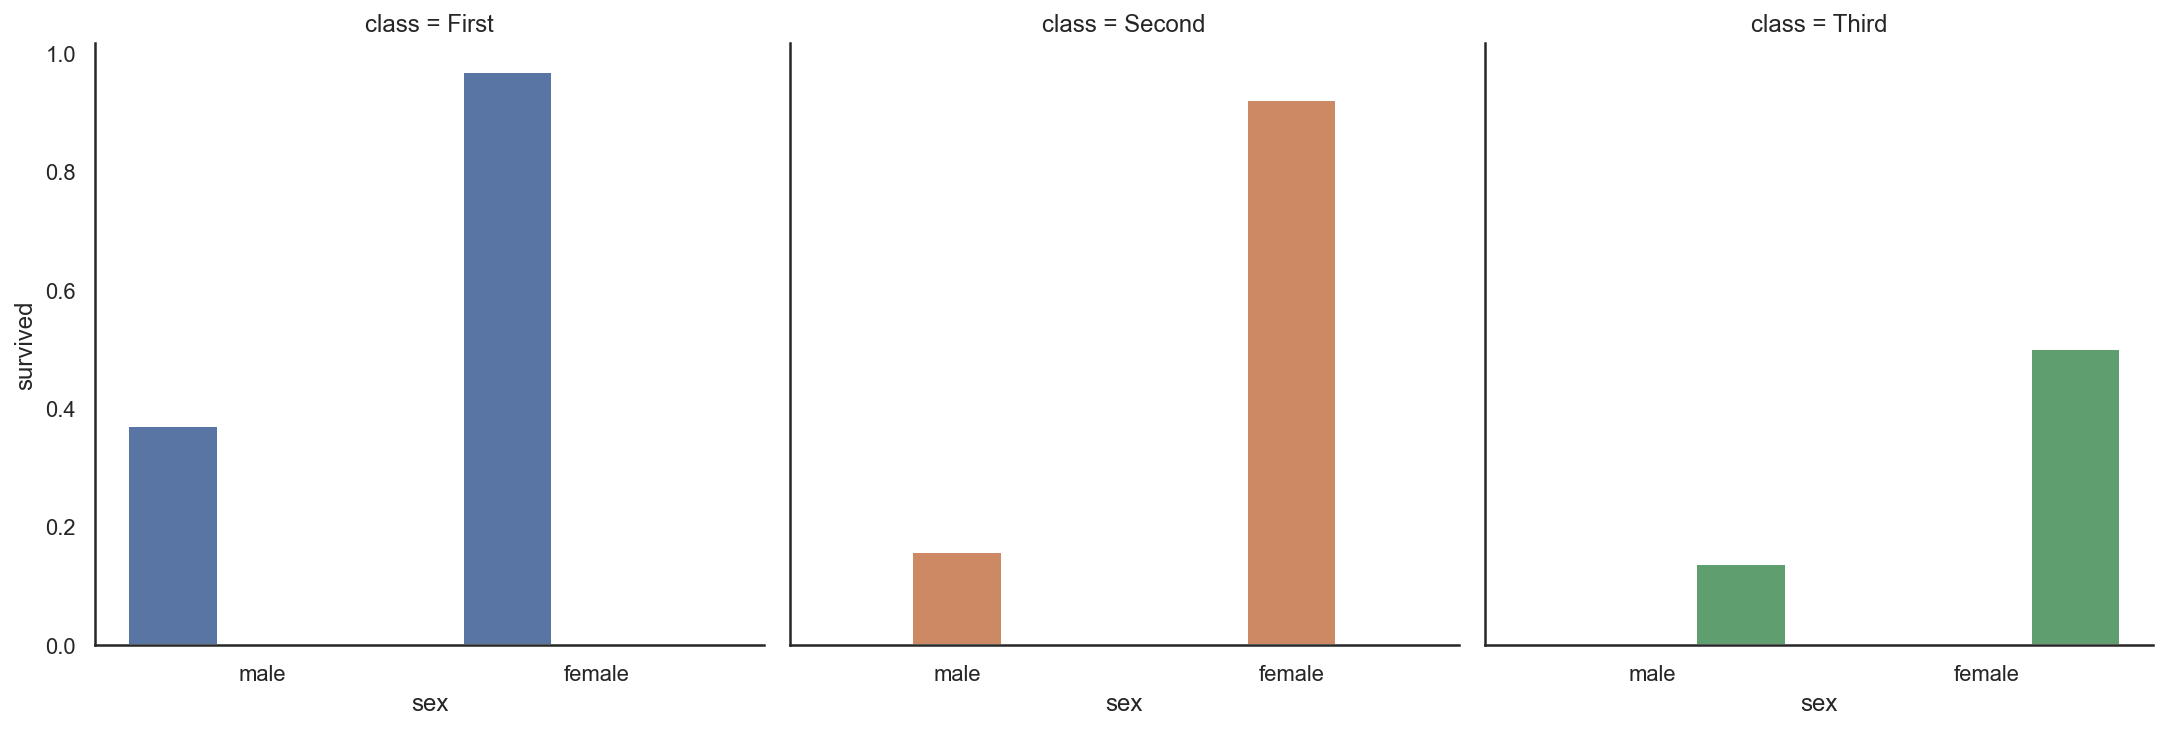

In [89]:
# barplot 을 서브플롯으로 하는방법 : catplot.
a = sns.catplot(x="sex", y="survived", data=titanic, hue="class",ci=None,
                kind="bar", col="class")

<AxesSubplot:xlabel='deck', ylabel='count'>

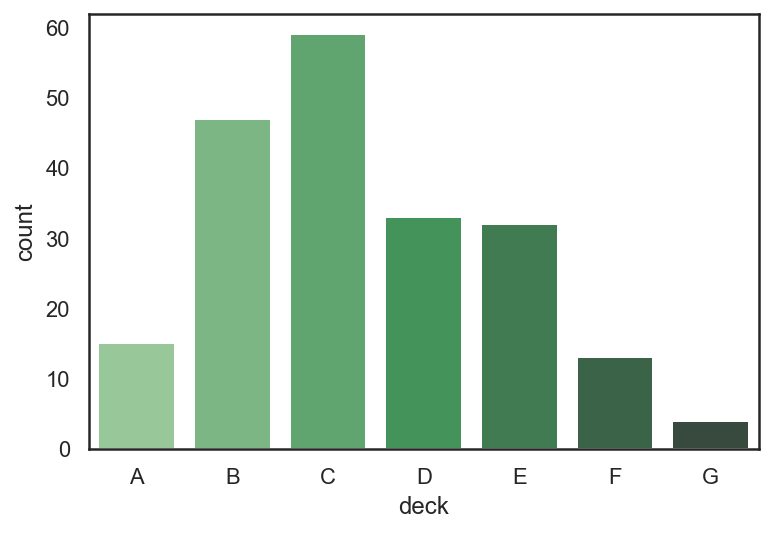

In [92]:
# deck별 관측수를 막대그래프로 표현.
sns.countplot(x="deck",data=titanic, palette="Greens_d")

<AxesSubplot:xlabel='class', ylabel='survived'>

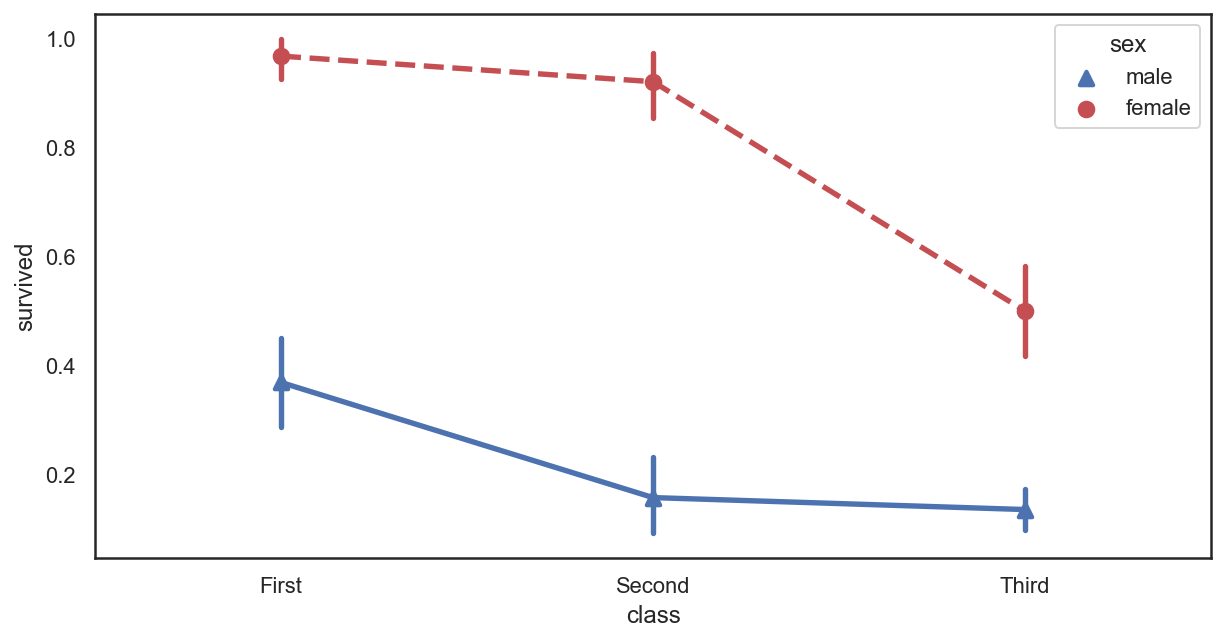

In [93]:
# class별 survived 값을 sex별로 pointplot
plt.figure(figsize=(10,5))
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male":"b","female":"r"},
              markers=["^","o"],
              linestyles=['-','--'])

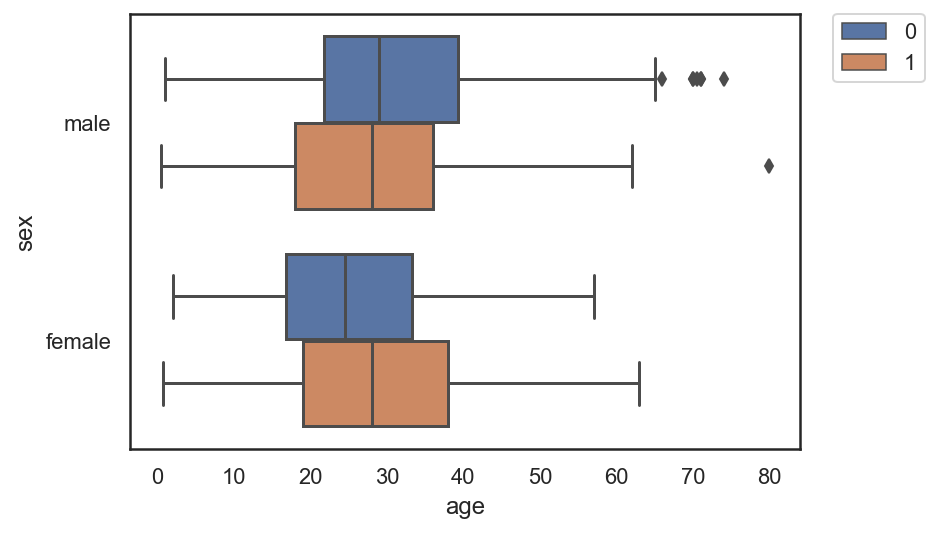

In [97]:
# boxplot, voilnplot, boxenplot
sns.boxplot(y='sex', x='age', data=titanic, hue='survived')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

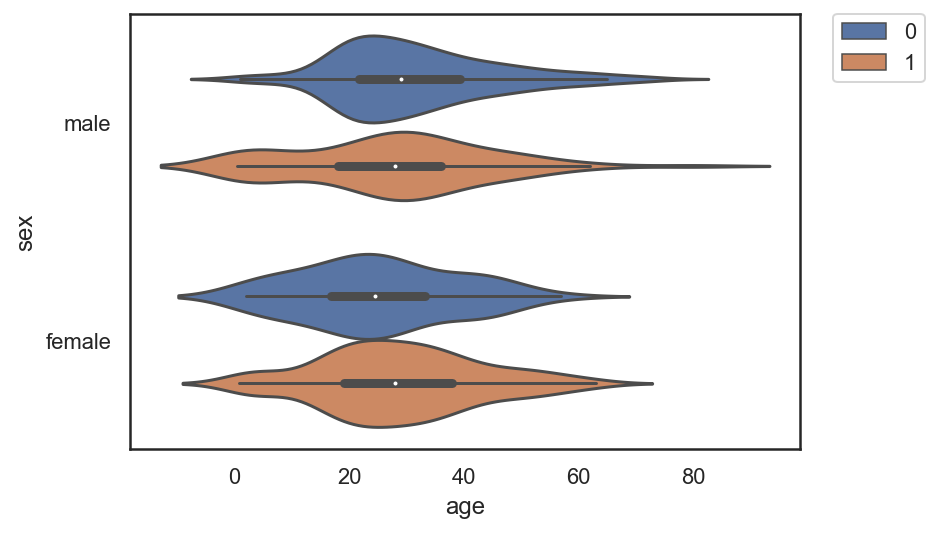

In [100]:
sns.violinplot(y='sex', x='age', data=titanic, hue='survived')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

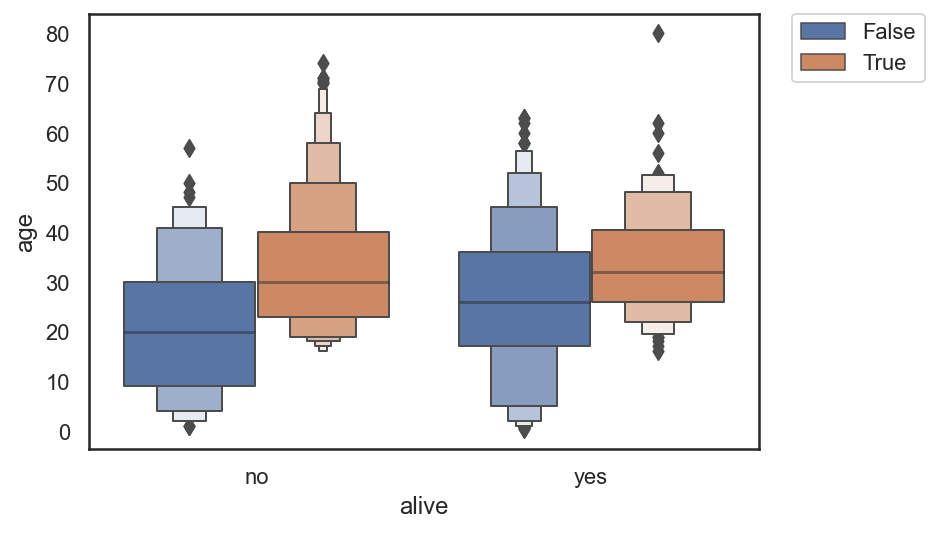

In [102]:
sns.boxenplot(x="alive", y="age", hue="adult_male", data=titanic)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**3) 쌍관계 그래프**

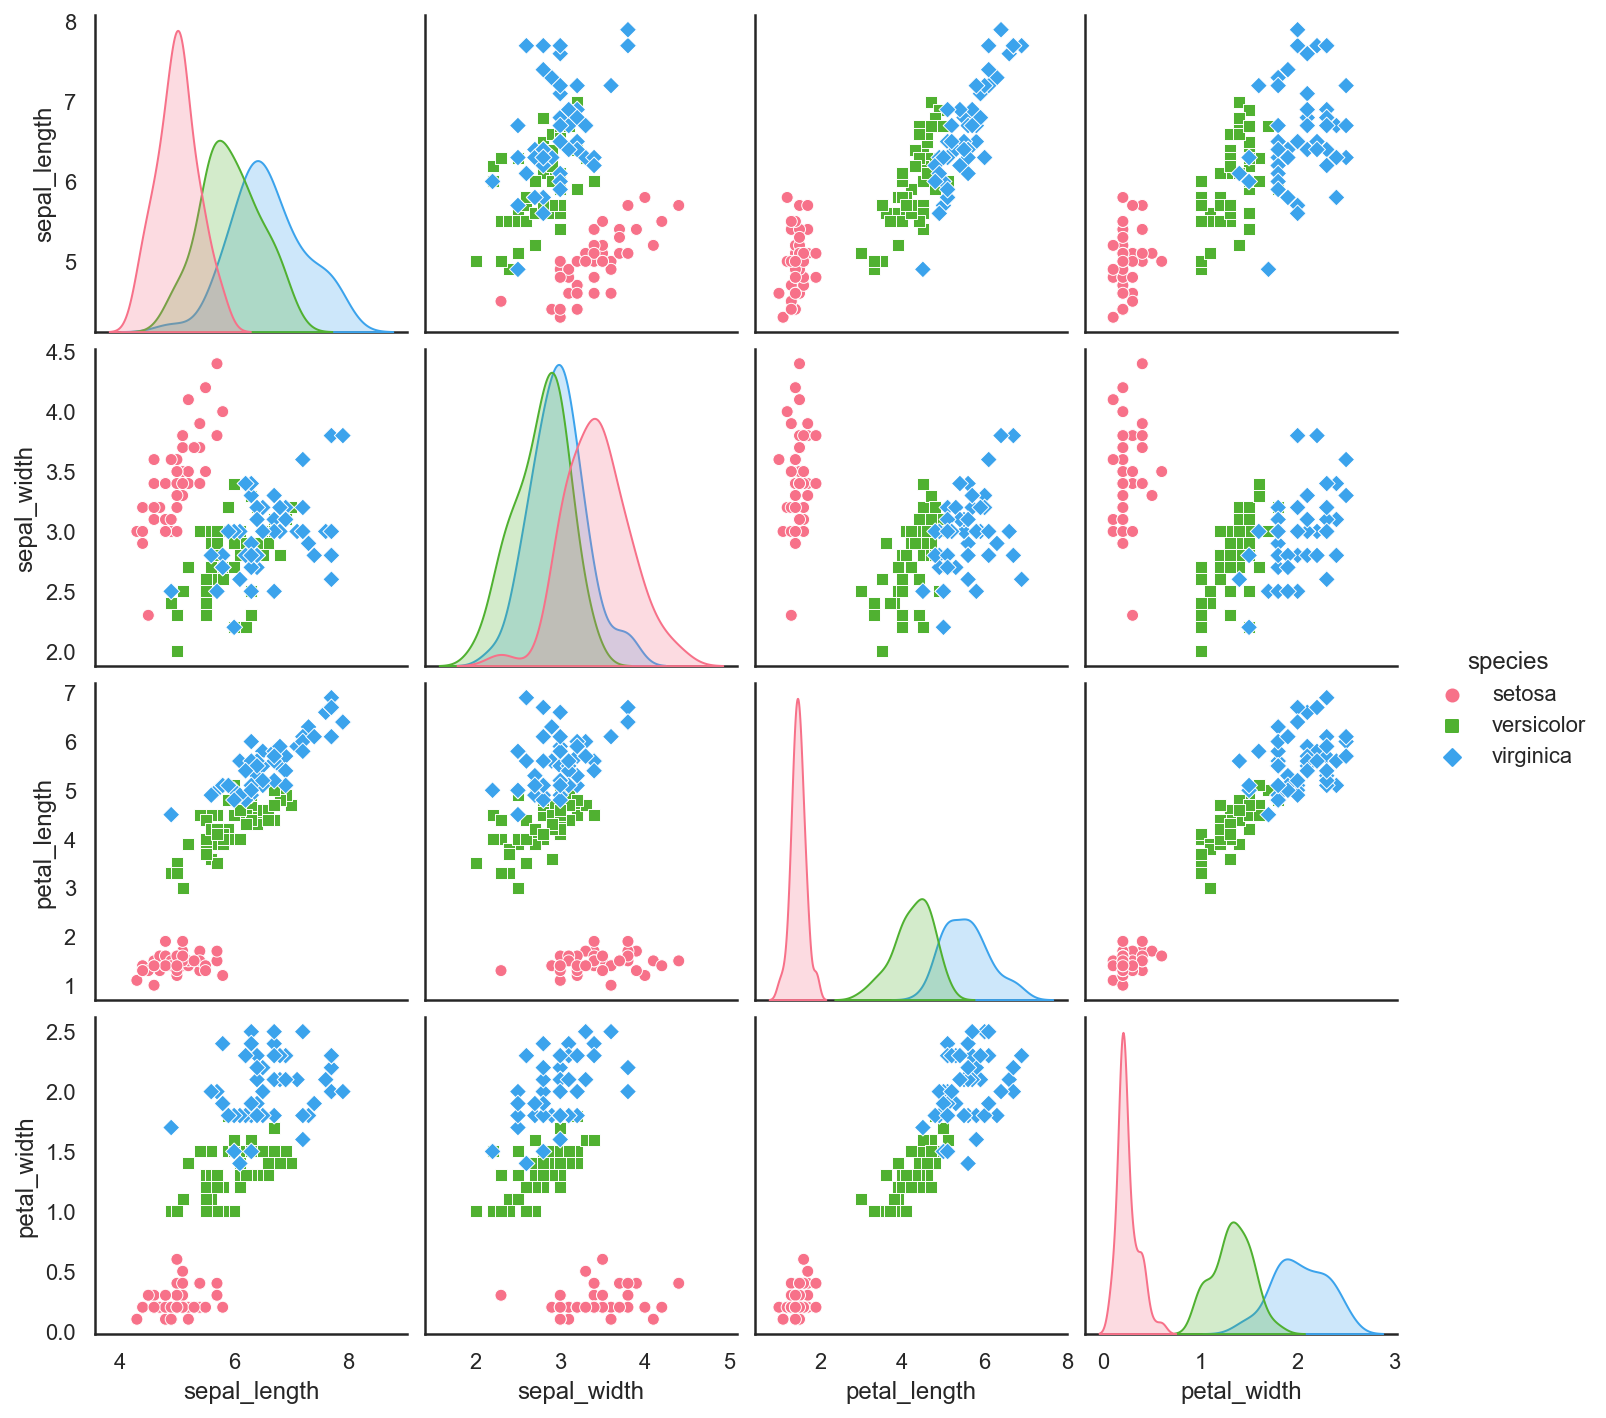

In [107]:
sns.pairplot(data=iris, hue="species", palette="husl", markers=['o','s','D'])

In [108]:
import numpy as np
x = np.random.randn(100)
len(x)

100

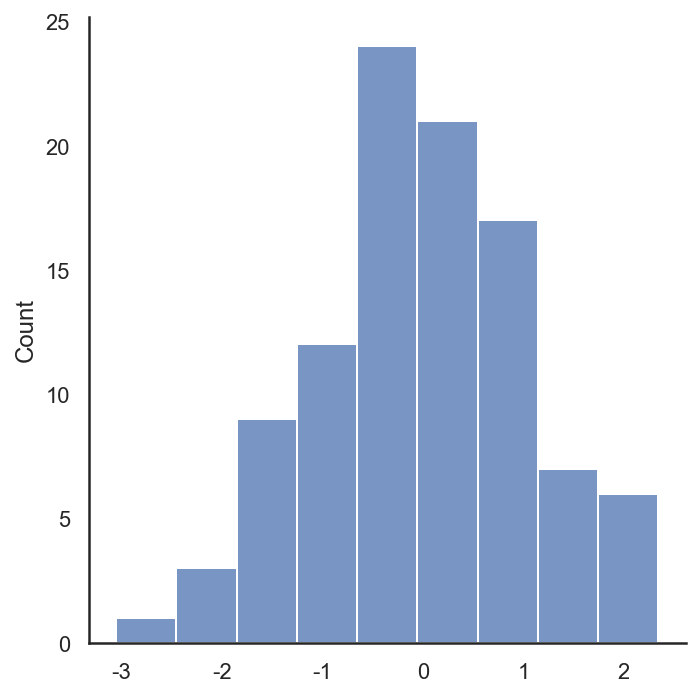

In [110]:
sns.displot(x, kde=False)

**4) 회귀 그래프**

In [117]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


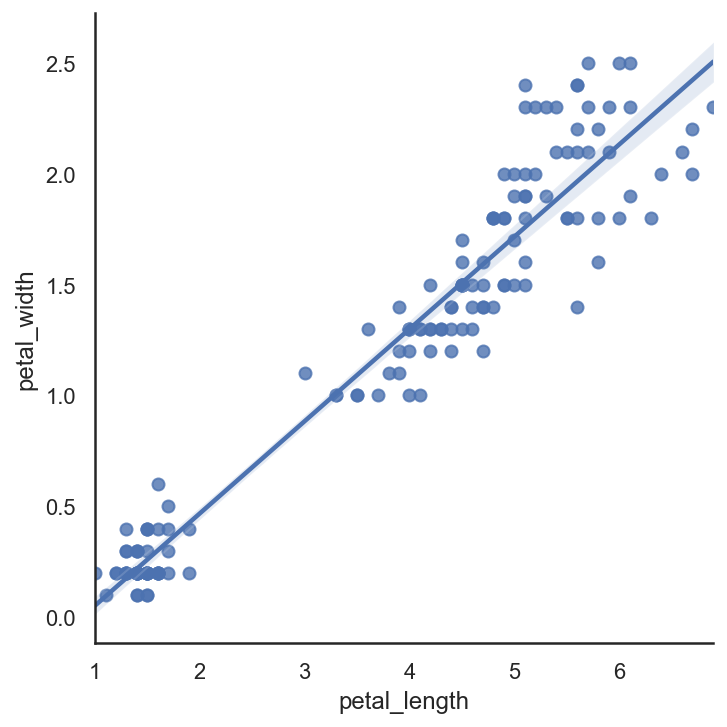

In [118]:
sns.lmplot(x="petal_length", y="petal_width", data=iris)
# sns.scatterplot(x="sepal_length", y="sepal_width", data=iris)

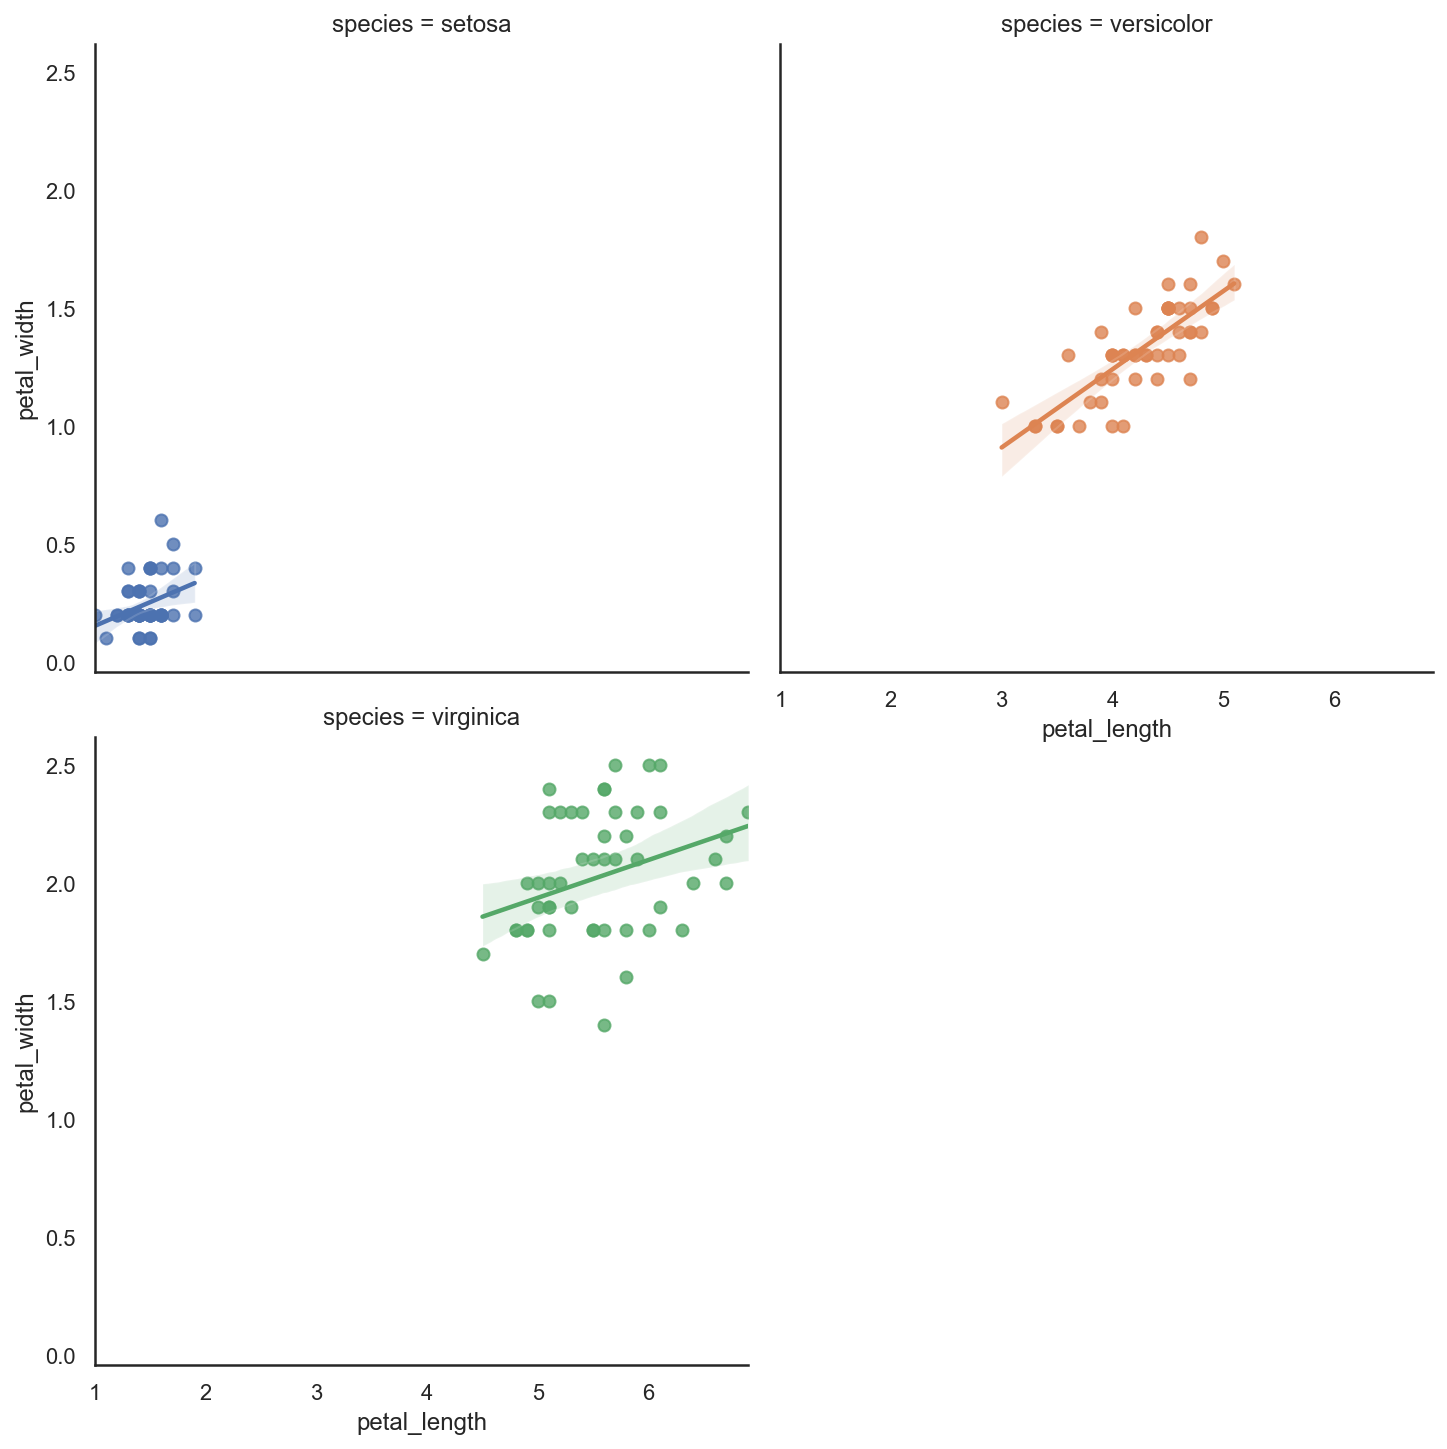

In [124]:
#회귀모형을 만드는 함수 : lmplot, regplot
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue="species", col="species",
           col_wrap=2)

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

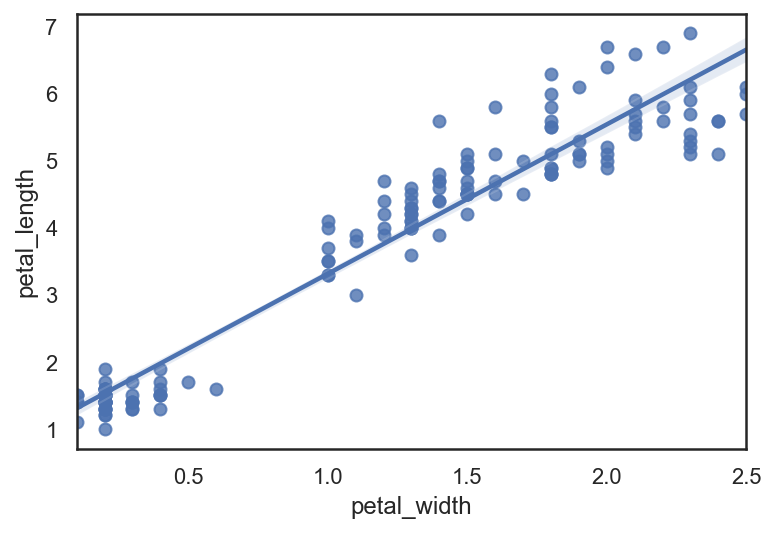

In [121]:
# regplot 의 단점. hue가 안된다.
sns.regplot(x="petal_width", y="petal_length", data=iris)

**5) 행렬그래프**

In [125]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

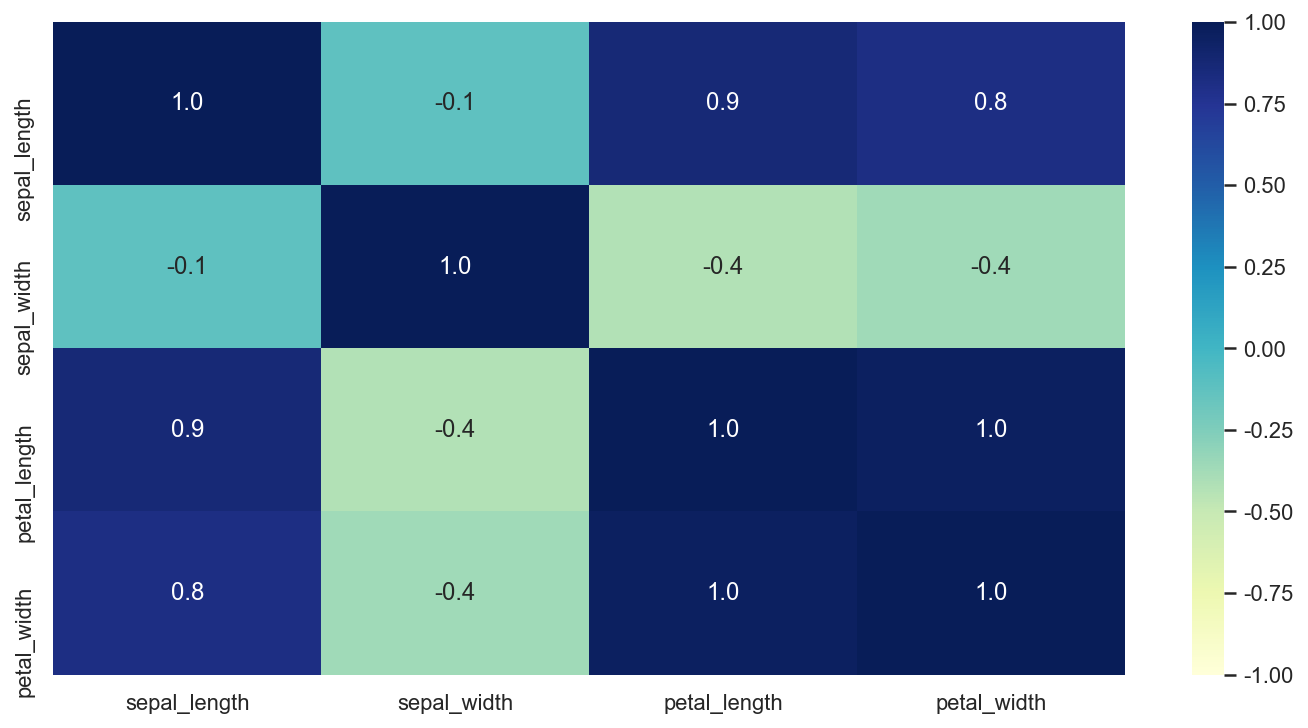

In [131]:
plt.figure(figsize=(12,6))
sns.heatmap(iris.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu",
            fmt=".1f") #fmt=".1f" 소수점 1자리까지. cmap="파레트 종류들."

## 3.4 다중 그래프를 위한 FacetGrid
https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

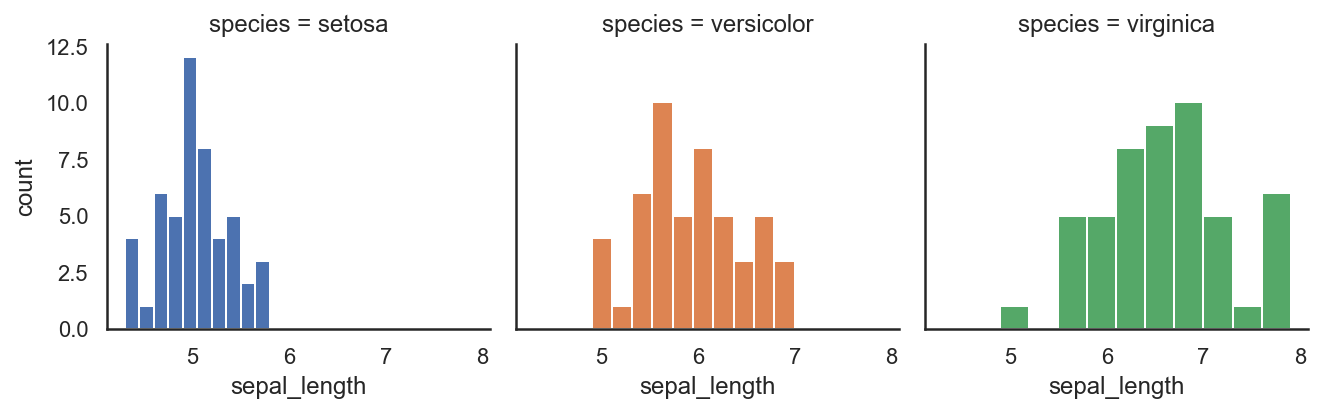

In [135]:
g = sns.FacetGrid(iris, col="species", hue="species")
g.map(plt.hist,"sepal_length")
g.set_axis_labels(y_var="count")
plt.show()

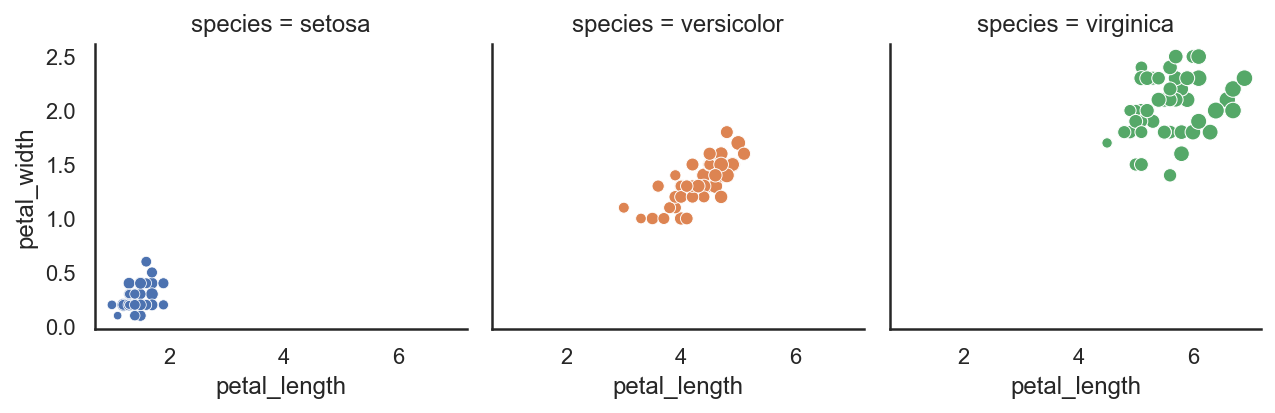

In [139]:
g = sns.FacetGrid(iris, col="species", hue="species")
g.map(sns.scatterplot,"petal_length","petal_width", size=iris.sepal_length)
plt.savefig('파일이름.png')
# size=iris.sepal_length 에 값이 작으면 작은모양. 크면 큰 모양.
# sns.scatterplot(x="petal_length", y="petal_width", data=iris)